# Print a simplified ETL layout from python

Printing to scale on stack exchange: https://stackoverflow.com/questions/29400116/using-matplotlib-how-can-i-print-something-actual-size

In [19]:
import matplotlib.pyplot as plt

## Simple example

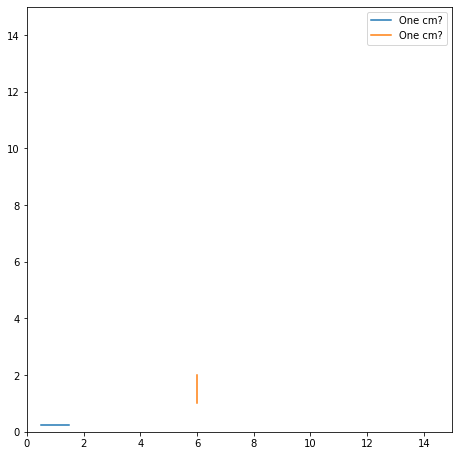

In [20]:
left_margin = 1.   # cm
right_margin = 1.  # cm
figure_width = 15. # cm
figure_height = 15. # cm
top_margin = 1.    # cm
bottom_margin = 1. # cm

box_width = left_margin + figure_width + right_margin   # cm
box_height = top_margin + figure_height + bottom_margin # cm

cm2inch = 1/2.54 # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(box_width*cm2inch,box_height*cm2inch))
ax = fig.add_subplot(111)
#ax.plot([1,2,3])

ax.set_ylim(0,15)
ax.set_xlim(0,15)

ax.plot([0.5, 1.5],[0.25, 0.25],label='One cm?')
ax.plot([6,6],[1,2], label='One cm?')
ax.legend()

fig.subplots_adjust(left   = left_margin / box_width,
                    bottom = bottom_margin / box_height,
                    right  = 1. - right_margin / box_width,
                    top    = 1. - top_margin   / box_height,
                    )
fig.savefig('ten_x_seven_cm.png', dpi=128)
# dpi = 128 is what works in my display for matching the designed dimensions.

## ETL single SH

In [21]:
%reload_ext autoreload
%autoreload 2

from ETL import *;

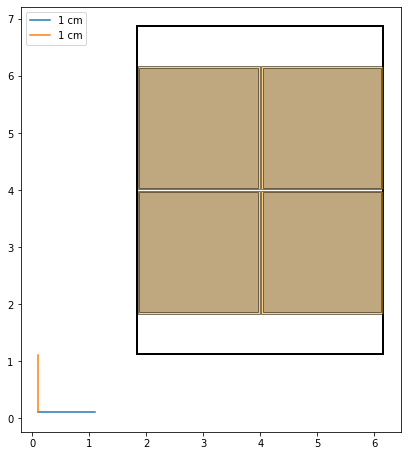

In [36]:
sensor_x = 2.14
sensor_y = 2.16
s = Sensor(sensor_x, sensor_y,deadspace=0.03)  # 3 sides of 0.3mm, 1 side of 0.5mm
m = Module(4.310, 5.750, n_sensor_x=2, n_sensor_y=2, sensor_distance_y=sensor_y+0.02, sensor_distance_x=sensor_x+0.02)
# this module is now 1mm larger in y

left_margin = 1.   # cm
right_margin = 1.  # cm
figure_width = 15. # cm
figure_height = 15. # cm
top_margin = 1.    # cm
bottom_margin = 1. # cm

box_width = left_margin + figure_width + right_margin   # cm
box_height = top_margin + figure_height + bottom_margin # cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(box_width*cm2inch,box_height*cm2inch))
ax = fig.add_subplot(111)
#ax.plot([1,2,3])

m.populate(s)

m.move_by(4,4)

plt.rcParams['figure.figsize'] = [15, 15]

pm = m.getPolygon()
plt.gca().add_patch(pm)

for sen in m.sensors:
    plt.gca().add_patch(sen.getPolygon())
    plt.gca().add_patch(sen.getPolygon(active=True))


ax.set_ylim(0,15)
ax.set_xlim(0,15)

ax.plot([0.1,1.1],[0.1,0.1],label='1 cm')
ax.plot([0.1,0.1],[0.1,1.1], label='1 cm')
ax.legend()

fig.subplots_adjust(left   = left_margin / box_width,
                    bottom = bottom_margin / box_height,
                    right  = 1. - right_margin / box_width,
                    top    = 1. - top_margin   / box_height,
                    )

fig.savefig('module_scale.png', dpi=300)
fig.savefig('module_scale.pdf', dpi=500)

plt.axis('scaled')
plt.show()

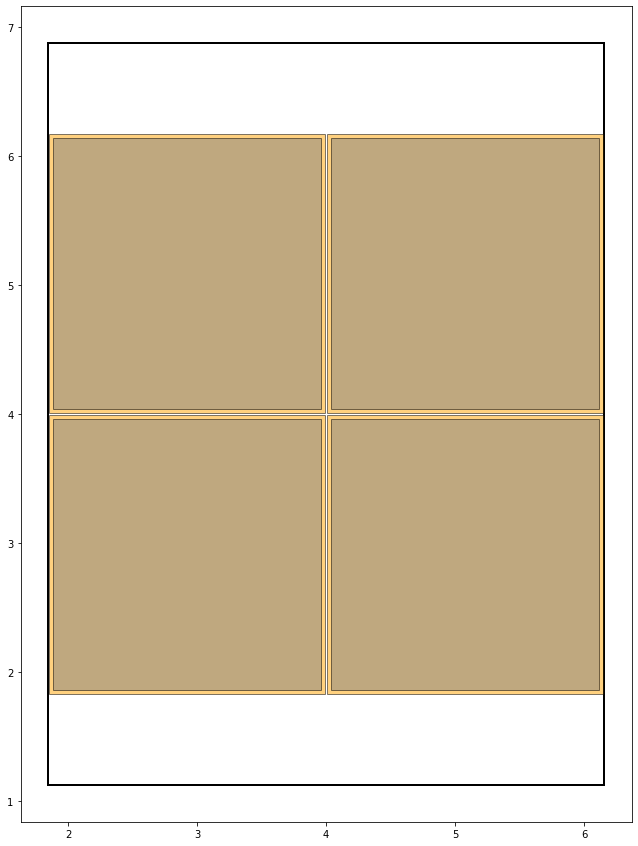

In [42]:
rb = ReadoutBoard(10, module_y, color='green')
pb = ReadoutBoard(10,2.95, color='red')
plt.rcParams['figure.figsize'] = [15, 15]

pm = m.getPolygon()
plt.gca().add_patch(pm)

for sen in m.sensors:
    plt.gca().add_patch(sen.getPolygon())
    plt.gca().add_patch(sen.getPolygon(active=True))
    
plt.axis('scaled')
plt.show()
r_inner = 31.5
r_outer = 118.5

module_gap = 0.5

edge_x = 6  # 6mm is the default

detector = {}

SM = SuperModule(m, pb, rb, n_modules=3, module_gap=module_gap, orientation='above')

detector['disk1_front'] = Dee(r_inner, r_outer)
detector['disk1_front'].populate(SM, edge_x=edge_x, center_RB=True)
plt.rcParams['figure.figsize'] = [15, 15]

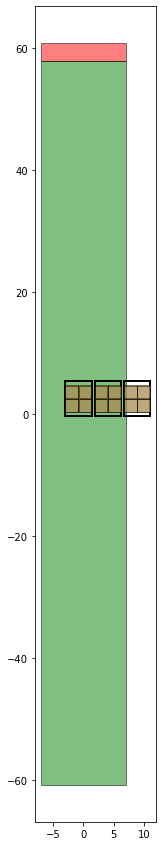

In [44]:
module_x = 2.14
module_y = 2.16
#plt.gca().add_patch(SM.getPolygon())
plt.gca().add_patch(SM.PB.getPolygon())
plt.gca().add_patch(SM.RB.getPolygon())

for mod in SM.modules:
    plt.gca().add_patch(mod.getPolygon())
    for sen in mod.sensors:
        plt.gca().add_patch(sen.getPolygon())
        plt.gca().add_patch(sen.getPolygon(active=True))

plt.axis('scaled')
plt.show()